In [31]:
!pip install emoji

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML/ml_data/spam.csv') #write your own file path
df.head()



Mounted at /content/drive


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape


(5572, 2)

In [5]:
# Check null values in each column
print(df.isnull().sum())

# Check total null values
print("Total missing values:", df.isnull().sum().sum())

# Show rows with nulls (if any)
print(df[df.isnull().any(axis=1)])



Category    0
Message     0
dtype: int64
Total missing values: 0
Empty DataFrame
Columns: [Category, Message]
Index: []


In [6]:
df.drop_duplicates(inplace=True)


In [7]:
#now it should be false
df.duplicated().any()


np.False_

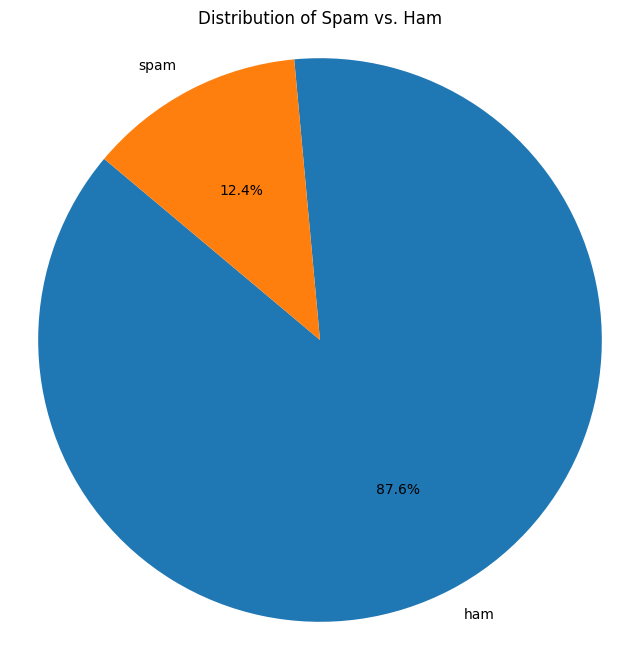

In [8]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

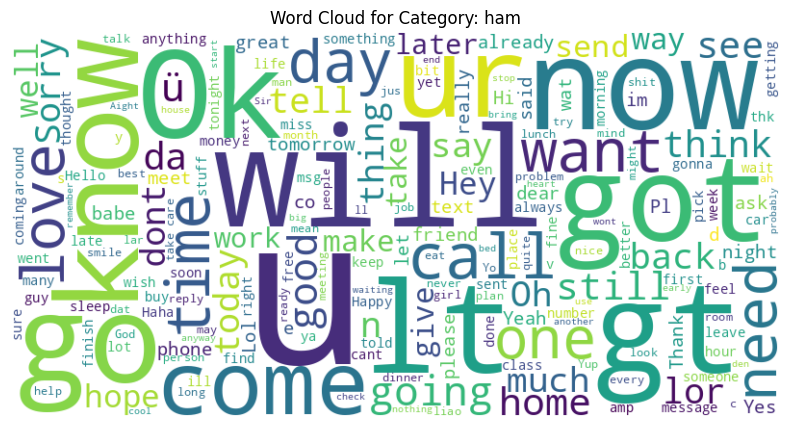

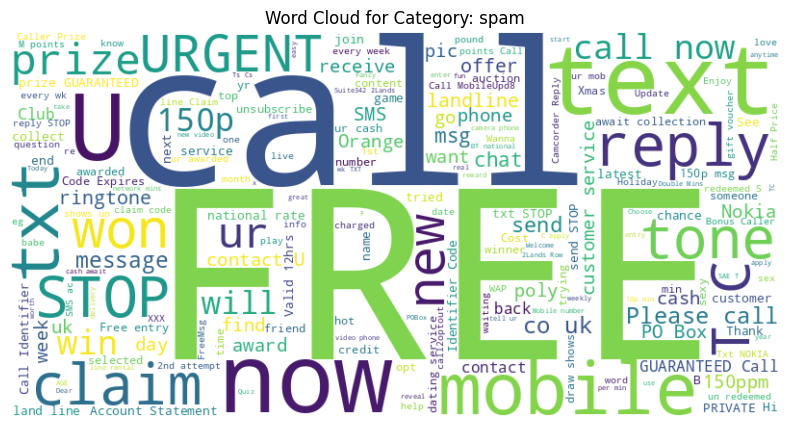

In [9]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [10]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [11]:
# Convert 'Text' column to lowercase
df["Message"] = df["Message"].str.lower()

print(df.head())


   Category                                            Message
0         0  go until jurong point, crazy.. available only ...
1         0                      ok lar... joking wif u oni...
2         1  free entry in 2 a wkly comp to win fa cup fina...
3         0  u dun say so early hor... u c already then say...
4         0  nah i don't think he goes to usf, he lives aro...


In [13]:
# Remove extra white spaces from the 'Text' column
df["Message"] = df["Message"].str.strip()           # remove leading/trailing spaces
df["Message"] = df["Message"].str.replace(r"\s+", " ", regex=True)  # replace multiple spaces with single space


print(df.head())

   Category                                            Message
0         0  go until jurong point, crazy.. available only ...
1         0                      ok lar... joking wif u oni...
2         1  free entry in 2 a wkly comp to win fa cup fina...
3         0  u dun say so early hor... u c already then say...
4         0  nah i don't think he goes to usf, he lives aro...


In [14]:
# Function to remove HTML tags from text
import re

# Function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile(r'<.*?>')   # matches anything inside < >
    return re.sub(clean, '', str(text))

# Apply to 'Message' column
df['Message'] = df['Message'].apply(remove_html_tags)


In [15]:


# Define a function to remove URLs using regular expressions
def remove_urls(text):
    url_pattern = re.compile(r'http\S+|www\.\S+')  # matches http://, https://, www.
    return re.sub(url_pattern, '', str(text))      # replace URLs with empty string

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_urls)




In [16]:



def remove_special_characters(text):
    # Keep only letters, numbers, and spaces
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return re.sub(pattern, '', str(text))

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)



In [17]:

# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', str(text))  # remove all digits

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)


In [18]:


# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)




In [19]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [20]:


# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    new_words = [chat_words.get(w.lower(), w) for w in words]  # replace if found
    return " ".join(new_words)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(replace_chat_words)



In [21]:


# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
import emoji

# Function to remove emojis
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')  # replace emojis with empty string

# Apply function
df['Message'] = df['Message'].apply(remove_emojis)



In [23]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [24]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [25]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Solve this problem using Logistic Regression(using numpy from scratch)

In [29]:
import numpy as np

class LogisticRegressionScratchMiniBatch:
    def __init__(self, lr=0.01, n_iters=1000, batch_size=64):
        self.lr = lr
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        # Avoid log(0)
        eps = 1e-9
        return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            # shuffle before each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for j in range(0, n_samples, self.batch_size):
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]

                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.sigmoid(linear_model)

                dw = (1/len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
                db = (1/len(y_batch)) * np.sum(y_pred - y_batch)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            # compute loss at the end of each epoch
            loss = self.compute_loss(y, self.sigmoid(np.dot(X, self.weights) + self.bias))
            self.losses.append(loss)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)


In [30]:
model_scratch = LogisticRegressionScratchMiniBatch(lr=0.1, n_iters=100, batch_size=128)
model_scratch.fit(X_train, y_train)

# Predictions
y_pred_scratch = model_scratch.predict(X_test)

# Accuracy
acc_scratch = np.mean(y_pred_scratch == y_test)
print("Scratch Mini-Batch Logistic Regression Accuracy:", acc_scratch)

Scratch Mini-Batch Logistic Regression Accuracy: 0.9718992248062015


#Now Use sklearn library to fit the data using logistic regression and compare results

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# -------------------------
# Logistic Regression (Sklearn)
# -------------------------
clf = LogisticRegression(max_iter=1000)  # increase max_iter to ensure convergence
clf.fit(X_train, y_train)

# Predictions
y_pred_sklearn = clf.predict(X_test)

# -------------------------
# Evaluation
# -------------------------
print("Sklearn Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall:", recall_score(y_test, y_pred_sklearn))
print("F1-score:", f1_score(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))


Sklearn Logistic Regression Results:
Accuracy: 0.9796511627906976
Precision: 0.9831932773109243
Recall: 0.8602941176470589
F1-score: 0.9176470588235294
Confusion Matrix:
 [[894   2]
 [ 19 117]]
